<a href="https://colab.research.google.com/github/biku1998/Applied_Stats/blob/master/Applied_Stats_relations_between_random_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this notebook we will see how can be measure the relationship between 2 random variables

Let's say we have collected heights and weights of students in a classroom, and now i want to know is there a realtionship between these 2 attributes that i have collected ?

### So there are 3 measures of Quantifying such a relationships


1.   Co-variance
2.   Pearson correlation coeff
3.   Spearman rank correlation coeff



## Co-variance

let's first recap variance

We know that it measures how far a set of numbers are spread out from their mean.

$$variance = \frac{1}{n}\sum_{i=1}^n(Xi-\mu_{x})\times(Xi-\mu_{x})$$

### Mathematical form of Co-variance

$$Co-variance(X,Y) = \frac{1}{n}\sum_{i=1}^n(Xi-\mu_{x})\times(Yi-\mu_{y})$$

$$-\infty<cov(X,Y)<+\infty $$

That means 

$$Co-variance(X,X) = Variance(X)$$

**Co-variance rule of thumb**
* $$Co-variance(X,Y) = +ve~~if~~X\uparrow,Y\uparrow$$
* $$Co-variance(X,Y) = -ve~~if~~X\uparrow,Y\downarrow$$

#### Visually the above 2 pointers is

<img src = https://cdn-images-1.medium.com/max/800/1*GH0ou22oJEwAw89GkrS8-w.png alt = "positive and negative correlation pic" width = 400/>


**Drawback of co-variance**

* if i change the measurment units i.e how i am going to measure my height and weight, the co-variance will change for the same dataset

## Let's see some practical examples using our heart dataset from Kaggle

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_heart = pd.read_csv('https://raw.githubusercontent.com/biku1998/Plotly-Practice/master/Data/heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
def demo_co_variance(feature_1,feature_2,df,title = None):
    """
    This function will compute and plot co-variance of 2 datsets
    feature_1  and feature_2 are continuous variables from the dataset
    """
    cov = np.cov(df[feature_1],df[feature_2])[0][1] # it spits out 2*2 matrix
    print(f'co-variance({feature_1},{feature_2}) = {cov}')
    sns.scatterplot(x = feature_1,y = feature_2,data = df)
    if title != None:
        plt.title(f'{feature_1} and {feature_2} for {title}')
    else:
        plt.title(f'{feature_1} and {feature_2}')
    plt.grid()
    plt.show()

In [0]:
df_heart_zero = df_heart[df_heart['target'] == 0]
df_heart_one = df_heart[df_heart['target'] == 1]

co-variance(thalach,oldpeak) = -2.7249593495934947


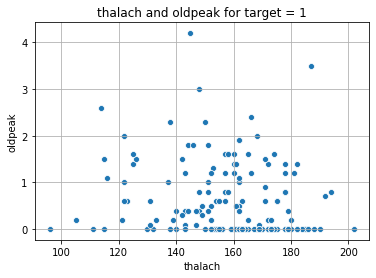

co-variance(thalach,oldpeak) = -6.267132127366972


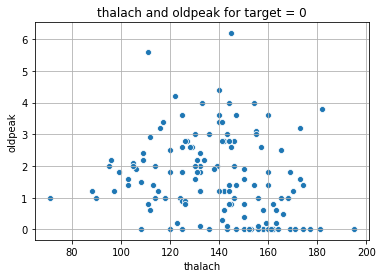

In [59]:
f_1 = "thalach"
f_2 = "oldpeak"
demo_co_variance(f_1,f_2,df_heart_one,'target = 1')
demo_co_variance(f_1,f_2,df_heart_zero,'target = 0')

Observation

         For both heart patients and healthy patients thalach and oldpeak have negative co-variance 
         that means the variables change in opposite directions.

co-variance(chol,oldpeak) = 2.413078344419808


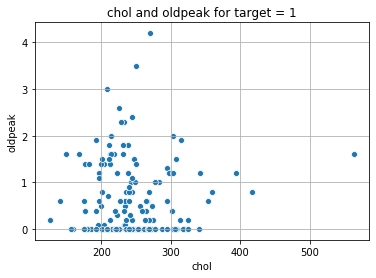

co-variance(chol,oldpeak) = -0.6016502697556309


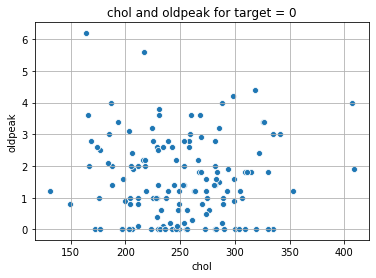

In [25]:
demo_co_variance('chol','oldpeak',df_heart_one,'target = 1')
demo_co_variance('chol','oldpeak',df_heart_zero,'target = 0')

Observation

         For  heart patients chol and oldpeak have positive co-variance 
         that means the variables change in same directions.

         For  non heart patients chol and oldpeak have negative co-variance 
         that means the variables change in opposite directions.


## Pearson Correlation coeff (pcc)

This metric solves the problem we have with co-variance i.e suppose we have a positive co-variance but how much positive ? or negative ? 

$$pcc~is~denoted~by~\rho$$

$$\rho =  \frac{cov(X,Y)}{\sigma_x\sigma_y}$$

$$-1\leq \rho\leq1 $$

Let's see graphically how value of pcc changes

<img src = https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png alt = "pcc values img" width = 400/>


### Pcc does a very good job when  relationship between our variables is linear

**Drawbacks**

Person correlation can't capture complex non-linear relations between the variables


In [0]:
from scipy.stats import pearsonr
def demo_pearson_cor(feature_1,feature_2,df,title = None):
    """
    This function will compute and plot co-variance of 2 datsets
    feature_1  and feature_2 are continuous variables from the dataset
    """
    pr,_ = pearsonr(df[feature_1],df[feature_2])
    print(f'co-variance({feature_1},{feature_2}) = {pr}')
    sns.scatterplot(x = feature_1,y = feature_2,data = df)
    if title != None:
        plt.title(f'{feature_1} and {feature_2} for {title}')
    else:
        plt.title(f'{feature_1} and {feature_2}')
    plt.grid()
    plt.show()


co-variance(chol,thalach) = -0.03822816193344889


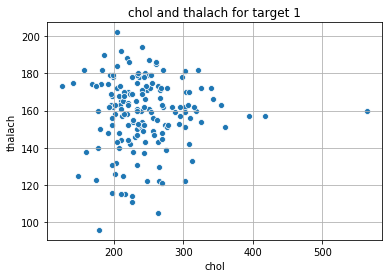

co-variance(chol,thalach) = 0.007267163086116751


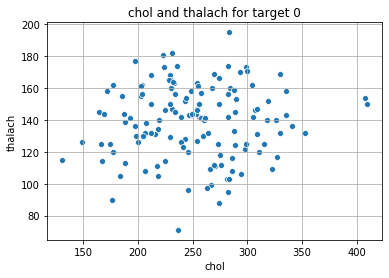

In [74]:
f_1 = "chol"
f_2 = "thalach"

demo_pearson_cor(f_1,f_2,df_heart_one,'target 1')
demo_pearson_cor(f_1,f_2,df_heart_zero,'target 0')

## Spearman correlation coeff

In Spearman corr coeff instead of using our original X and Y we create a rank column for both X and Y and then take Pearson Corr coeff of that ranks.

How ranks are assign ?

Take X, Sort the values in asc, the smallest value will get rank 1 and so on. We repeat the same process for Y





In [0]:
from scipy.stats import spearmanr
def demo_spearman_cor(feature_1,feature_2,df,title = None):
    """
    This function will compute and plot co-variance of 2 datsets
    feature_1  and feature_2 are continuous variables from the dataset
    """
    sp,_ = spearmanr(df[feature_1],df[feature_2])
    print(f'co-variance({feature_1},{feature_2}) = {sp}')
    sns.scatterplot(x = feature_1,y = feature_2,data = df)
    if title != None:
        plt.title(f'{feature_1} and {feature_2} for {title}')
    else:
        plt.title(f'{feature_1} and {feature_2}')
    plt.grid()
    plt.show()


co-variance(chol,thalach) = -0.03822816193344889


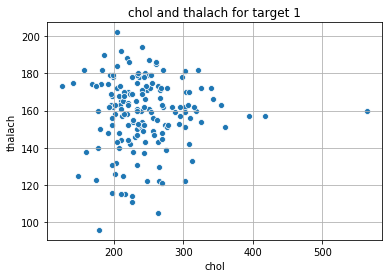

co-variance(chol,thalach) = 0.007267163086116751


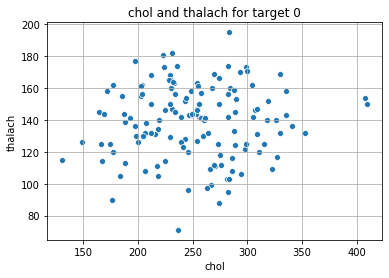

In [73]:
f_1 = "chol"
f_2 = "thalach"

demo_spearman_cor(f_1,f_2,df_heart_one,'target 1')
demo_spearman_cor(f_1,f_2,df_heart_zero,'target 0')

# Correlaton vs Causation
### If 2 random variable say X and Y has very hight correlation coeff it **does not mean** X causes Y or Y causes X 